In [113]:
# explore dataset



In [114]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
target_df = pd.read_csv('data/csv_files/train/train_base.csv')

In [116]:
df = pd.read_csv('data/csv_files/train/train_static_0_0.csv')

C:\Users\salma\AppData\Local\Temp\ipykernel_22524\824583393.py:1: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/csv_files/train/train_static_0_0.csv')


In [117]:
df['cardtype_51L'].value_counts()

cardtype_51L
INSTANT         123849
PERSONALIZED      1935
Name: count, dtype: int64

In [118]:
df['numinstregularpaid_973L'].value_counts()

numinstregularpaid_973L
6.0      55320
12.0     46040
3.0      33350
9.0      21539
10.0     20846
         ...  
280.0        1
304.0        1
356.0        1
337.0        1
302.0        1
Name: count, Length: 301, dtype: int64

In [119]:
# drop columns that are objects

df = df.select_dtypes(include=['float64'])

df.dtypes

actualdpdtolerance_344P           float64
amtinstpaidbefduel24m_4187115A    float64
annuity_780A                      float64
annuitynextmonth_57A              float64
applicationcnt_361L               float64
                                   ...   
sumoutstandtotal_3546847A         float64
sumoutstandtotalest_4493215A      float64
totaldebt_9A                      float64
totalsettled_863A                 float64
totinstallast1m_4525188A          float64
Length: 128, dtype: object

In [120]:
# heat map
# to see which columns have the most effect on our target value

In [121]:
target_df = target_df[['case_id', 'target']]
target_df 

,case_id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
1526654,2703450,0
1526655,2703451,0
1526656,2703452,0
1526657,2703453,0


In [122]:
df

,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,...,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A
0,NaN,NaN,1917.6,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN
1,NaN,NaN,3134.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN
2,NaN,NaN,4937.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN
3,NaN,NaN,4643.6,0.0000,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,NaN,NaN,1.0,1.0,NaN,NaN,0.000,0.00,NaN
4,NaN,NaN,3390.2,0.0000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003752,0.0,117624.79,3045.0,4488.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,44848.000,44848.000,44848.000,199664.67,8976.000
1003753,0.0,134887.40,1200.0,4382.8003,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,10.0,39392.000,39392.000,39392.000,209840.00,8765.601
1003754,0.0,69186.62,6000.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,76455.62,NaN
1003755,0.0,117331.00,11565.4,13781.2000,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,NaN,0.0,2.0,55084.402,55084.402,55084.402,168248.31,13781.200


In [123]:
# finding not null values in the dataset
df.notnull().sum()

actualdpdtolerance_344P            707071
amtinstpaidbefduel24m_4187115A     574903
annuity_780A                      1003757
annuitynextmonth_57A              1003755
applicationcnt_361L               1003757
                                   ...   
sumoutstandtotal_3546847A          687938
sumoutstandtotalest_4493215A       295381
totaldebt_9A                      1003755
totalsettled_863A                 1003755
totinstallast1m_4525188A           138692
Length: 128, dtype: int64

In [124]:
# merge the two dataframes

df = df.join(target_df)
model_df = df 

In [125]:
# drop case_id
df = df.drop('case_id', axis=1)

In [126]:
df.columns

Index(['actualdpdtolerance_344P', 'amtinstpaidbefduel24m_4187115A',
       'annuity_780A', 'annuitynextmonth_57A', 'applicationcnt_361L',
       'applications30d_658L', 'applicationscnt_1086L', 'applicationscnt_464L',
       'applicationscnt_629L', 'applicationscnt_867L',
       ...
       'posfstqpd30lastmonth_3976962P', 'price_1097A', 'sellerplacecnt_915L',
       'sellerplacescnt_216L', 'sumoutstandtotal_3546847A',
       'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A',
       'totinstallast1m_4525188A', 'target'],
      dtype='object', length=129)

In [127]:
df.shape

(1003757, 129)

# Summary Statistics

In [128]:
df.describe()

,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,...,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,target
count,707071.000000,574903.000000,1.003757e+06,1.003755e+06,1.003757e+06,1.003757e+06,1.003757e+06,1.003757e+06,1.003757e+06,1.003757e+06,...,911303.000000,869385.000000,1.003757e+06,1.003757e+06,6.879380e+05,2.953810e+05,1.003755e+06,1.003755e+06,138692.000000,1.003757e+06
mean,0.054391,50692.545111,3.875598e+03,1.348499e+03,2.689894e-05,1.261839e-01,4.200011e-01,1.238874e+00,3.163963e-01,2.546880e+00,...,0.028932,33339.941490,1.537563e-01,1.449694e+00,2.646509e+04,2.606057e+04,1.818406e+04,7.927638e+04,10576.192565,3.034798e-02
std,8.743984,65457.938573,2.920237e+03,2.687341e+03,9.309873e-03,4.458153e-01,2.683453e+00,1.031643e+01,2.648092e+00,3.741651e+00,...,0.167616,33206.102117,4.337781e-01,1.859990e+00,5.571921e+04,5.703931e+04,4.779889e+04,1.256841e+05,16354.417830,1.715430e-01
min,0.000000,0.000000,8.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.405000e+03,-2.405000e+03,0.000000e+00,0.000000e+00,0.222000,0.000000e+00
25%,0.000000,6452.900150,1.895800e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,13400.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3142.400100,0.000000e+00
50%,0.000000,26937.000000,3.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000,24478.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.978000e+04,6008.500000,0.000000e+00
75%,0.000000,68960.840000,4.989800e+03,1.866600e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,...,0.000000,43956.000000,0.000000e+00,2.000000e+00,2.718295e+04,2.570092e+04,1.196770e+04,1.018738e+05,11627.300250,0.000000e+00
max,3676.000000,992476.500000,1.060070e+05,8.562080e+04,5.000000e+00,2.500000e+01,4.430000e+02,2.470000e+02,7.700000e+01,9.700000e+01,...,1.000000,761867.440000,8.000000e+00,3.300000e+01,1.210629e+06,1.085048e+06,1.210629e+06,7.988198e+06,794899.200000,1.000000e+00


# Highest correlated columns

In [129]:
# the correlation matrix
correlation_matrix = df.corr()

# want to find columns that are highly correlated to the target column
column_of_interest = 'target'

# extract correlations with the specific column
specific_corr = correlation_matrix[column_of_interest].drop(column_of_interest, axis=0)

# filter for high negative or positive correlations
high_corr_with_specific = specific_corr[abs(specific_corr) > 0.01].sort_values()

print("Columns highly correlated with", column_of_interest, ":\n", high_corr_with_specific)


Columns highly correlated with target :
 lastotherlnsexpense_631A   -0.021900
lastotherinc_902A           0.059449
Name: target, dtype: float64


In [130]:
# All columns with high correlation to the target value as a list
high_corr_columns = high_corr_with_specific.index.tolist()
high_corr_columns

['lastotherlnsexpense_631A', 'lastotherinc_902A']

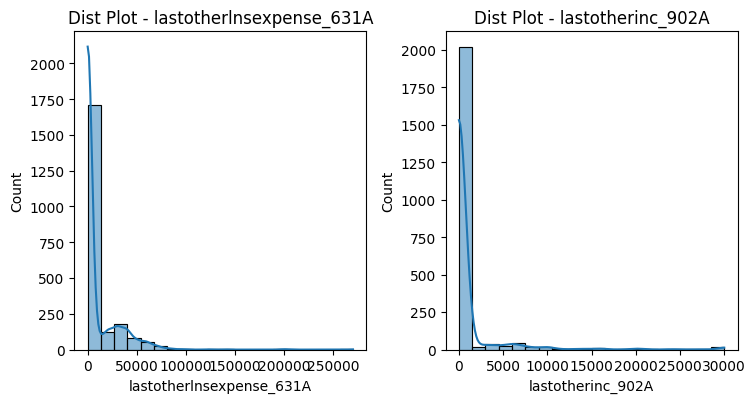

In [131]:
plt.figure(figsize=(15, 15))

# distribution plots for each column
for i, column in enumerate(df[high_corr_columns].columns):
    # 4x4 grid
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df[column], kde=True, bins=20)
    plt.title(f'Dist Plot - {column}')

# adjusting layout
plt.tight_layout()
plt.show()

In [132]:
# save high correlated columns model to data folder

In [133]:
model_columns = high_corr_columns + ['target']
model_columns

['lastotherlnsexpense_631A', 'lastotherinc_902A', 'target']

In [134]:

model_df = model_df[high_corr_columns + ['target']]


In [135]:
# There is a lot of missing data in the dataset more than 90% of the data is NaN
model_df.notnull().sum()

lastotherlnsexpense_631A       2171
lastotherinc_902A              2228
target                      1003757
dtype: int64

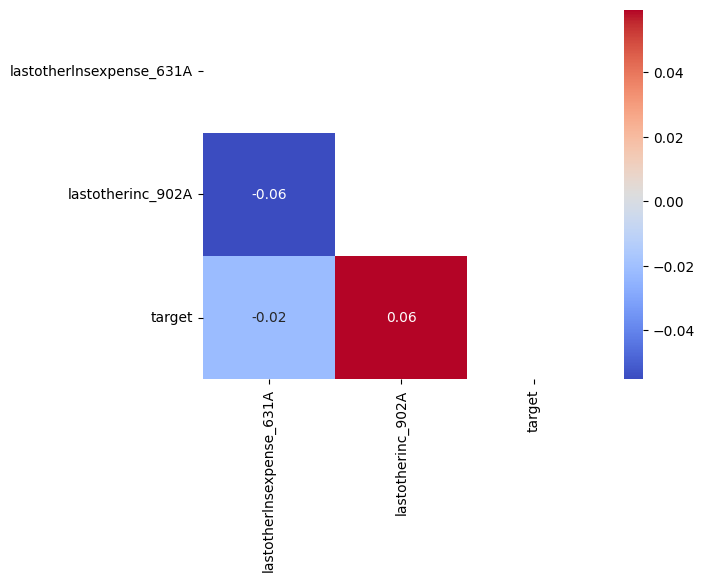

In [136]:
# heatmap of high correlated columns

corr_matrix = model_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, mask=mask)
plt.show()

In [137]:
model_df.to_csv('data/high_corr_model.csv')

In [138]:
# visualize heatmap of only highest correlated columns

